In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import glob
import re, os

In [30]:
!pwd

/Users/Devansh/Documents/GitHub/deep_learnt_controls/Simple_Spacecraft


In [31]:
#collate data
df_s_full = pd.DataFrame()

In [32]:
data_s = []
first_row_s = []
data_c = []
first_row_c = []
to_be_deleted = []

index_s = set()
index_c = set()
    
    
for infile in glob.glob("data_apollo/*_sim_s.csv"):
    df = pd.read_csv(infile)
    
    data_s.append(df)
    
    first_row_s.append(list(df.iloc[0]))
    
    numbers = re.findall('\d+',infile)
    index_s.add(int(numbers[0]))
    
    
    
for infile in glob.glob("data_apollo/*_sim_c.csv"):
    df = pd.read_csv(infile)
    
    data_c.append(df)
    
    first_row_c.append(list(df.iloc[0]))
    
    numbers = re.findall('\d+',infile)
    index_c.add(int(numbers[0]))
    
    
df_s_full = pd.concat(data_s)
df_s_first = pd.DataFrame(first_row_s)
    
df_c_full = pd.concat(data_c)
df_c_first = pd.DataFrame(first_row_c)

In [5]:
if len(to_be_deleted)>0:
    import re, os
    numbers = re.findall('\d+',string)
    indexs = [int(n) for n in numbers]
    for ind in indexs:
        os.remove(f'data_apollo/{ind}_sim_s.csv')
        os.remove(f'data_apollo/{ind}_sim_c.csv')

In [33]:
index_s - index_c

set()

In [34]:
index_c - index_s

{2843, 2844, 2845}

In [24]:
if 0:
    df_s_full.to_csv('data_apollo/df_s_full.csv', index=False)
    df_c_full.to_csv('data_apollo/df_c_full.csv', index=False)
    

In [7]:
df_s_full.describe()

,0,1,2,3,4
count,500732.000000,500732.000000,500732.000000,500732.000000,500732.000000
mean,-0.622408,348.344594,0.020222,-5.600827,9172.863749
std,63.929275,422.591238,1.268840,6.029774,1260.115222
min,-247.995918,-0.000047,-9.986852,-29.999132,4923.601352
25%,-23.442951,21.136560,-0.382874,-8.474180,8204.062511
50%,-0.000033,163.607265,0.000303,-3.412819,9143.547142
75%,22.648405,547.518568,0.405379,-0.864659,10153.137924
max,260.497203,1999.480004,9.927334,0.004214,11999.575845


In [8]:
df_c_full.describe()

,0,1
count,501311.000000,501311.000000
mean,0.357522,-0.000160
std,0.059734,0.024357
min,0.181604,-0.282534
25%,0.314521,-0.004591
50%,0.354150,-0.000027
75%,0.396696,0.004354
max,0.779308,0.361813


In [9]:
df_c_first.describe()

,0,1
count,2206.000000,2206.000000
mean,0.428985,0.000692
std,0.068352,0.080311
min,0.299151,-0.282534
25%,0.378566,-0.046968
50%,0.422445,-0.000396
75%,0.469575,0.045907
max,0.779308,0.361813


In [10]:
df_s_first.describe()

,0,1,2,3,4
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,-4.490909,1261.677372,0.059112,-19.740338,9991.410483
std,112.486840,429.753621,4.359410,6.770341,1162.079654
min,-199.947030,500.056565,-9.986852,-29.999132,8001.698529
25%,-101.633787,880.928436,-2.954580,-25.424808,8981.662374
50%,-4.172595,1275.559984,0.072303,-20.512711,9990.195657
75%,88.644121,1634.949864,3.095000,-15.108208,11011.047591
max,199.882057,1999.480004,9.927334,-2.180389,11999.575845


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b80bf98>],
      dtype=object)

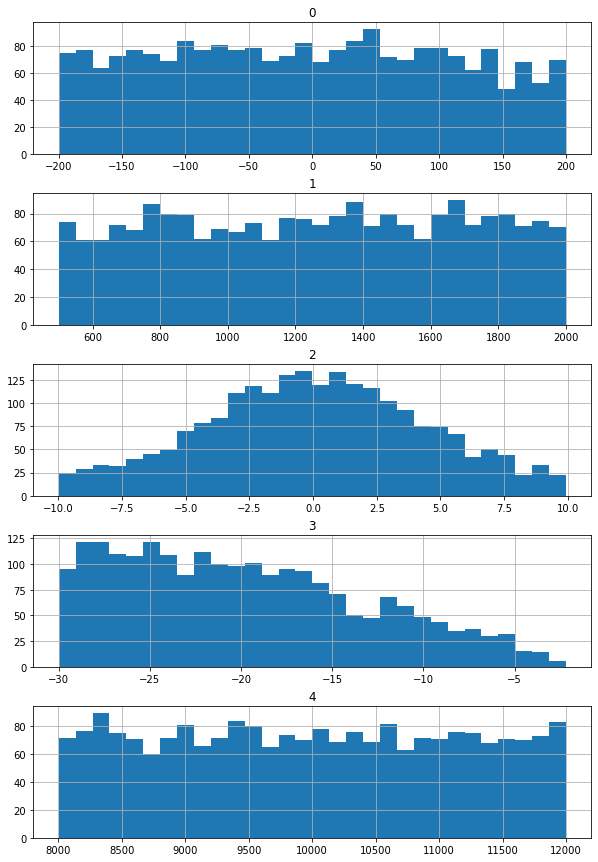

In [11]:
df_s_first.hist(bins=30, figsize=(10,15), layout=(5,1))

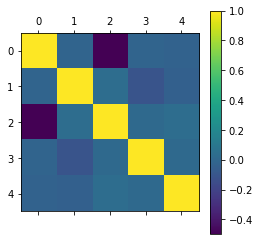

In [12]:
plt.matshow(df_s_first.corr())
plt.colorbar()

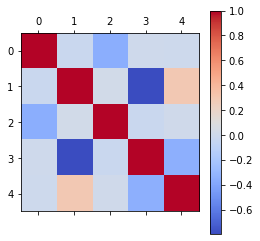

In [13]:
plt.matshow(df_s_full.corr())
plt.colorbar()
plt.set_cmap('coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121ec26a0>],
      dtype=object)

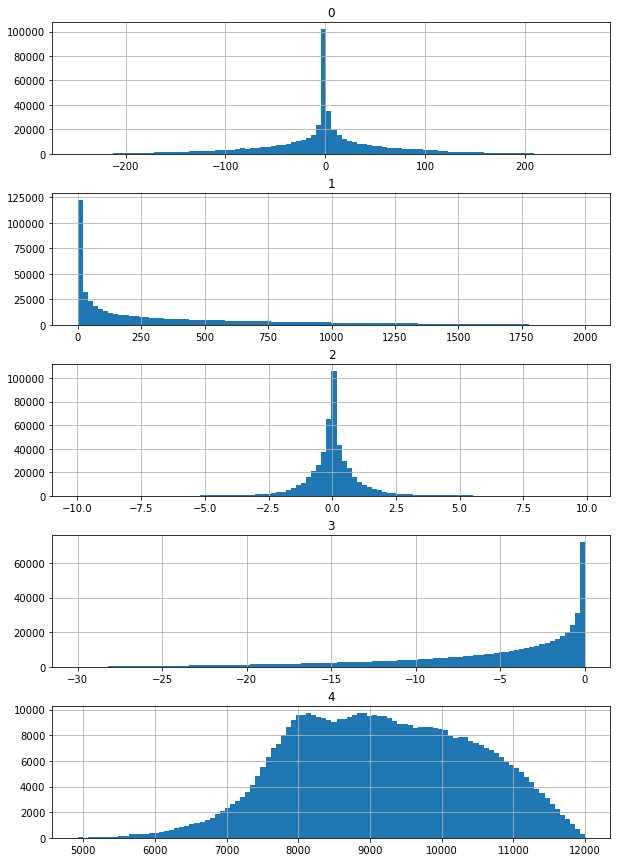

In [14]:
df_s_full.hist(bins=100, figsize=(10,15), layout=(5,1))

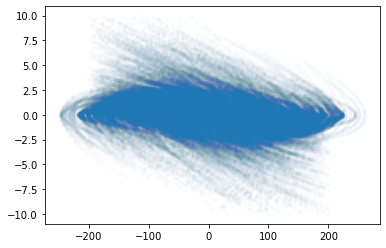

In [15]:
plt.scatter(df_s_full['0'],df_s_full['2'],marker='.',alpha=0.01)

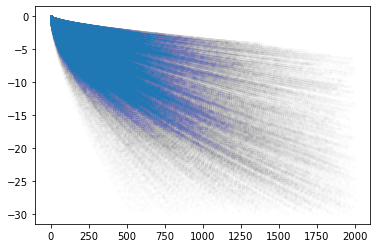

In [16]:
plt.scatter(df_s_full['1'],df_s_full['3'],marker='.',alpha=0.005)

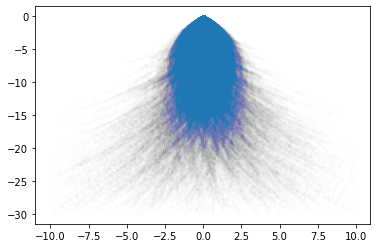

In [17]:
plt.scatter(df_s_full['2'],df_s_full['3'],marker='.',alpha=0.005)

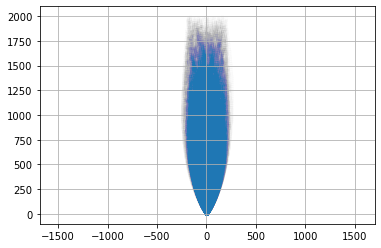

In [18]:
plt.scatter(df_s_full['0'],df_s_full['1'],marker='.',alpha=0.005)
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.grid()

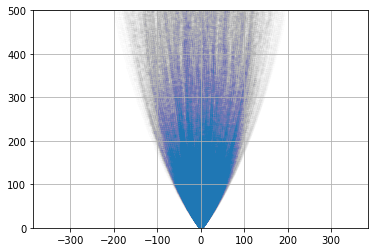

In [19]:
plt.scatter(df_s_full['0'],df_s_full['1'],marker='.',alpha=0.005)
ax = plt.gca()
plt.ylim([0, 500])
plt.xlim([-100, 100])
ax.set_aspect('equal', 'datalim')
plt.grid()

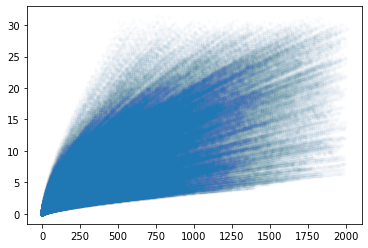

In [20]:
plt.scatter((df_s_full['0']**2+df_s_full['1']**2)**0.5,(df_s_full['2']**2+df_s_full['3']**2)**0.5,marker='.',alpha=0.01)

In [21]:
df_s_full.shape

(500732, 5)

In [22]:
df_c_full.shape

(501311, 2)

ValueError: x and y must be the same size

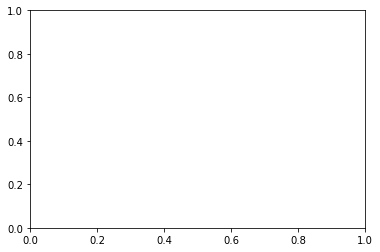

In [23]:
plt.scatter((df_s_full['0']**2+df_s_full['1']**2)**0.5,df_c_full['0'],marker='.',alpha=0.01)

In [ ]:
plt.scatter((df_s_full['2']**2+df_s_full['3']**2)**0.5,df_c_full['0'],marker='.',alpha=0.01)

In [ ]:
plt.figure()

for ind in range(2000):
    try:
        df = pd.read_csv(f'data_apollo/{ind}_sim_c.csv')
        plt.plot(df['1'])
    except:

        pass

ax = plt.gca()
plt.grid()

In [ ]:
df_c_full.hist(bins=100, figsize=(10,6), layout=(2,1))

In [ ]:
df_c_full['1'].describe()

In [ ]:
plt.scatter(df_c_full['1'],df_c_full['0'],marker='.',alpha=0.01)
plt.grid()

In [ ]:
import re
import os
index_s = []
index_c = []

for infile in glob.glob("data_apollo/*_sim_s.csv"):
    numbers = re.findall('\d+',infile)
    index_s.append(int(numbers[0]))
    
for infile in glob.glob("data_apollo/*_sim_c.csv"):
    numbers = re.findall('\d+',infile)
    index_c.append(int(numbers[0]))

In [ ]:
index_s

In [ ]:
index_c

In [ ]:
len(index_s)

In [ ]:
len(index_c)